## Our goal is to better present the relationship between stability and interestingess.
- specifically, an ideal figure would be able to show -- through colors or line types or makers, ect -- not only the correlation between stability and interestingness, but also include information on the number of blocks and the jitter value for those towers

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### read in data

In [2]:
df = pd.read_csv('curiotower_raw_data_run_0.csv')
df.columns

Index(['Unnamed: 0', '_id', 'type', 'iterationName', 'condition', 'prompt',
       'towerID', 'image_url', 'num_blocks', 'stim_version', 'catch_trial',
       'games', 'trialNum', 'prolificID', 'studyID', 'sessionID', 'gameID',
       'image_html', 'session_id', 'upper_bound', 'lower_bound', 'choices',
       'button_html', 'message', 'stimulus_duration', 'trial_duration',
       'trial_num', 'margin_vertical', 'margin_horizontal',
       'response_ends_trial', 'reaction_time', 'button_pressed',
       'startTrialTime', 'endTrialTime', 'trial_type', 'trial_index',
       'time_elapsed', 'internal_node_id', 'workerId', 'hitID', 'aID',
       'eventType', 'rt', 'responses', 'question_order', 'stability',
       'viewpoint'],
      dtype='object')

In [3]:
df.num_blocks.unique()

array([8., 2., 4.])

In [4]:
df_1 = df[['prolificID','towerID', 'condition','num_blocks', 'button_pressed', 'stability']]
df_1.head()

,prolificID,towerID,condition,num_blocks,button_pressed,stability
0,5e6095161a68693dc9e26545,curiotower_8_low_0005_1,stable,8.0,3.0,low
1,5e6095161a68693dc9e26545,curiotower_2_low_0000_0,stable,2.0,4.0,low
2,5b5d986b5256470001bc728d,curiotower_8_low_0004_1,stable,8.0,3.0,low
3,5e6095161a68693dc9e26545,curiotower_8_high_0002_1,stable,8.0,0.0,high
4,5a88aed6ae9a0b0001aa033e,curiotower_8_high_0007_1,stable,8.0,0.0,high


In [5]:
df_int = df_1 [df_1.condition == 'interesting'].reset_index()
df_sta = df_1 [df_1.condition == 'stable'].reset_index()

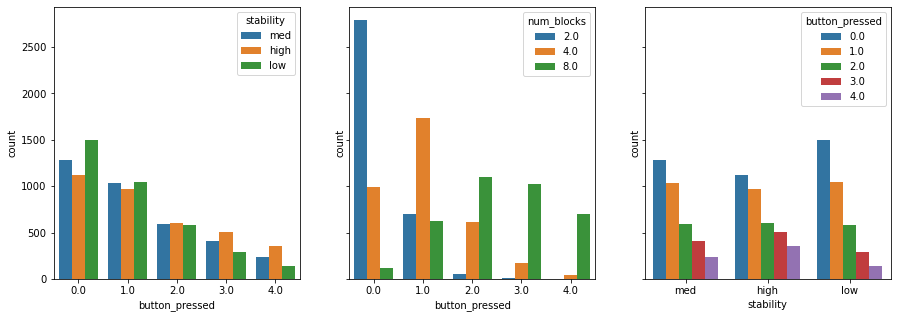

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.countplot(ax=axes[0], x=df_int['button_pressed'], hue=df_int['stability'])
sns.countplot(ax=axes[1], x=df_int['button_pressed'], hue=df_int['num_blocks'])
sns.countplot(ax=axes[2], x=df_int['stability'], hue=df_int['button_pressed'])
plt.show()

In [7]:
df_t = df_1.groupby(['towerID', 'condition','num_blocks', 'stability'])['button_pressed'].agg(['mean', 'std', 'size']).reset_index()
df_t.head()

,towerID,condition,num_blocks,stability,mean,std,size
0,curiotower_2_high_0000_0,interesting,2.0,high,0.445946,0.761072,74
1,curiotower_2_high_0000_0,stable,2.0,high,1.247312,1.028464,93
2,curiotower_2_high_0000_1,interesting,2.0,high,0.459459,0.577884,74
3,curiotower_2_high_0000_1,stable,2.0,high,0.881720,0.987415,93
4,curiotower_2_high_0001_0,interesting,2.0,high,0.216216,0.446302,74


In [8]:
df_int_r = df_t[df_t.condition == 'interesting']
df_sta_r = df_t[df_t.condition == 'stable']
df_t_r =pd.merge(df_int_r, df_sta_r, on = 'towerID')
df_t_r.head()

,towerID,condition_x,num_blocks_x,stability_x,mean_x,std_x,size_x,condition_y,num_blocks_y,stability_y,mean_y,std_y,size_y
0,curiotower_2_high_0000_0,interesting,2.0,high,0.445946,0.761072,74,stable,2.0,high,1.247312,1.028464,93
1,curiotower_2_high_0000_1,interesting,2.0,high,0.459459,0.577884,74,stable,2.0,high,0.881720,0.987415,93
2,curiotower_2_high_0001_0,interesting,2.0,high,0.216216,0.446302,74,stable,2.0,high,2.537634,0.950505,93
3,curiotower_2_high_0001_1,interesting,2.0,high,0.216216,0.446302,74,stable,2.0,high,2.913978,0.940119,93
4,curiotower_2_high_0002_0,interesting,2.0,high,0.256757,0.469941,74,stable,2.0,high,2.344086,1.016116,93


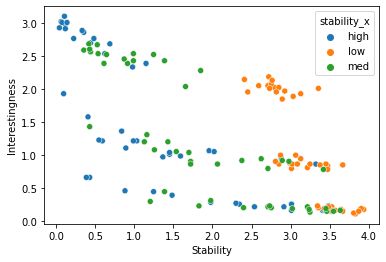

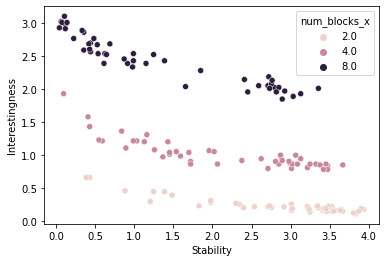

In [9]:
# stability rating ~ interestingness rating based on stability of towers
sns.scatterplot(x="mean_y", y="mean_x", data=df_t_r, hue="stability_x")
plt.xlabel('Stability')
plt.ylabel("Interestingness")
plt.show()

# stability rating ~ interestingness rating based on number of blocks of towers
sns.scatterplot(x="mean_y", y="mean_x", data=df_t_r, hue="num_blocks_x")
plt.xlabel('Stability')
plt.ylabel("Interestingness")
plt.show()

Correlation Coefficient: -0.7819706441516744


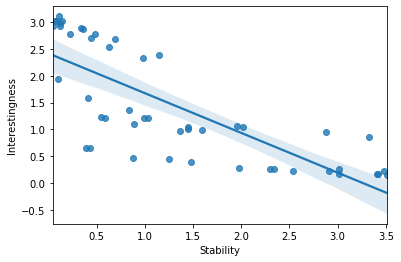

In [10]:
df_t_high = df_t_r[df_t_r.stability_x == 'high'][['mean_y', 'mean_x']]
print("Correlation Coefficient:",df_t_high['mean_x'].corr(df_t_high['mean_y']))
sns.regplot(data=df_t_high, x = "mean_y", y = "mean_x")
plt.xlabel('Stability')
plt.ylabel("Interestingness")
plt.show()

Correlation Coefficient: -0.8130806658038293


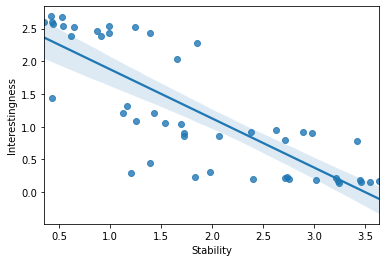

In [11]:
df_t_high = df_t_r[df_t_r.stability_x == 'med'][['mean_y', 'mean_x']]
print("Correlation Coefficient:",df_t_high['mean_x'].corr(df_t_high['mean_y']))
sns.regplot(data=df_t_high, x = "mean_y", y = "mean_x")
plt.xlabel('Stability')
plt.ylabel("Interestingness")
plt.show()

Correlation Coefficient: -0.8333503346555418


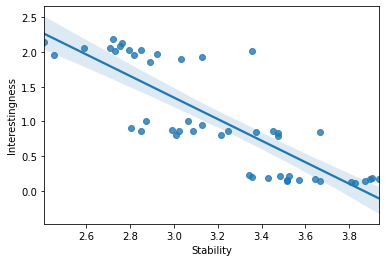

In [12]:
df_t_high = df_t_r[df_t_r.stability_x == 'low'][['mean_y', 'mean_x']]
print("Correlation Coefficient:",df_t_high['mean_x'].corr(df_t_high['mean_y']))
sns.regplot(data=df_t_high, x = "mean_y", y = "mean_x")
plt.xlabel('Stability')
plt.ylabel("Interestingness")
plt.show()

Correlation Coefficient: -0.8952304214445579


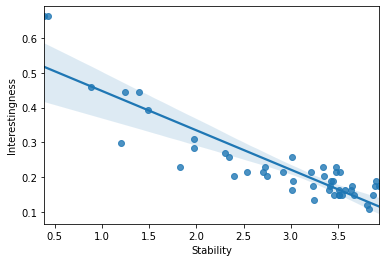

In [13]:
df_t_high = df_t_r[df_t_r.num_blocks_x == 2.0][['mean_y', 'mean_x']]
print("Correlation Coefficient:",df_t_high['mean_x'].corr(df_t_high['mean_y']))
sns.regplot(data=df_t_high, x = "mean_y", y = "mean_x")
plt.xlabel('Stability')
plt.ylabel("Interestingness")
plt.show()

Correlation Coefficient: -0.8294076578039252


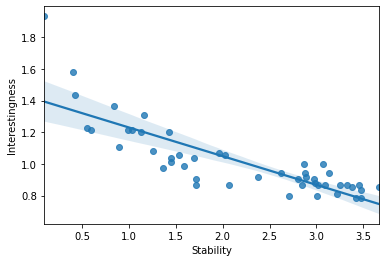

In [14]:
df_t_high = df_t_r[df_t_r.num_blocks_x == 4.0][['mean_y', 'mean_x']]
print("Correlation Coefficient:",df_t_high['mean_x'].corr(df_t_high['mean_y']))
sns.regplot(data=df_t_high, x = "mean_y", y = "mean_x")
plt.xlabel('Stability')
plt.ylabel("Interestingness")
plt.show()

Correlation Coefficient: -0.9333696122910274


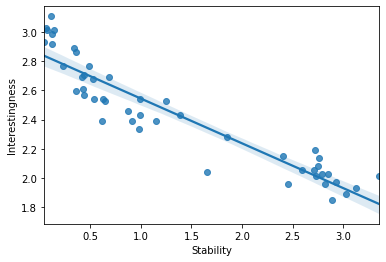

In [15]:
df_t_high = df_t_r[df_t_r.num_blocks_x == 8.0][['mean_y', 'mean_x']]
print("Correlation Coefficient:",df_t_high['mean_x'].corr(df_t_high['mean_y']))
sns.regplot(data=df_t_high, x = "mean_y", y = "mean_x")
plt.xlabel('Stability')
plt.ylabel("Interestingness")
plt.show()

In [16]:
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [17]:
outcome_1, predictors_1 = patsy.dmatrices('mean_y ~ mean_x',df_t_r)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 mean_y   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     130.3
Date:                Sun, 24 Jan 2021   Prob (F-statistic):           8.04e-22
Time:                        21:54:54   Log-Likelihood:                -184.21
No. Observations:                 144   AIC:                             372.4
Df Residuals:                     142   BIC:                             378.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2122      0.120     26.828      0.0

In [18]:
outcome_2, predictors_2 = patsy.dmatrices('mean_y ~ num_blocks_x', df_t_r)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 mean_y   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     50.95
Date:                Sun, 24 Jan 2021   Prob (F-statistic):           4.48e-11
Time:                        21:54:54   Log-Likelihood:                -209.01
No. Observations:                 144   AIC:                             422.0
Df Residuals:                     142   BIC:                             428.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.2863      0.184     17.870   

In [19]:
outcome_3, predictors_3 = patsy.dmatrices('mean_y ~ stability_x', df_t_r)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:                 mean_y   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     53.74
Date:                Sun, 24 Jan 2021   Prob (F-statistic):           4.50e-18
Time:                        21:54:55   Log-Likelihood:                -190.29
No. Observations:                 144   AIC:                             386.6
Df Residuals:                     141   BIC:                             395.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.3280      0

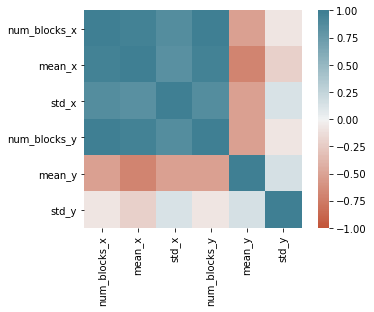

In [20]:
df_t_r1 = df_t_r.drop(['size_x','size_y'], 1)
corr = df_t_r1.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

### Group the data by tower and condition

In [21]:
df_tower = df.groupby(['towerID', 'condition'])['button_pressed'].agg(['mean', 'std', 'size']).reset_index()

In [22]:
tower_interesting = df_tower[df_tower.condition == 'interesting'].sort_values(by = 'mean', ascending = False)
df_interesting = df[df.condition == 'interesting'][['towerID','condition', 'button_pressed']]

tower_stable = df_tower[df_tower.condition == 'stable'].sort_values(by = 'mean', ascending = False)
df_stable = df[df.condition == 'stable'][['towerID','condition', 'button_pressed']]


### Make a basic correlation plot in seaborn

Correlation Coefficient: -0.6917600803038619


Text(0, 0.5, 'Interestingness')

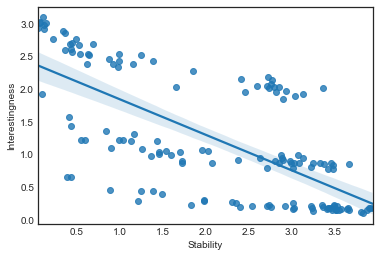

In [23]:
df_tower_interesting = df_tower[df_tower.condition == 'interesting']
df_tower_stable = df_tower[df_tower.condition == 'stable']

#merge the separate dataframes into one df for corr plot
df_corr =pd.merge(df_tower_interesting, df_tower_stable, on = 'towerID')


print("Correlation Coefficient:",df_corr['mean_x'].corr(df_corr['mean_y']))
plt.style.use('seaborn-white')

sns.regplot(data = df_corr, x ='mean_y', y = 'mean_x')
plt.xlabel('Stability')
plt.ylabel("Interestingness")